In [47]:
import pandas as pd
import numpy as np

- 대한민국 외래 방문객 추이 (2019/01 ~ 2024/12)
- 방문객 동향 변화 분석
- 특히 많거나 적은 유형 분석
- 목표는 더 많은 인원 = 돈
- 총 방문객 33,463,906
- 국가 / 성별 + 승무원 / 연령대 / 목적 별로 구분
- 판데믹 전후의 동향 변화에 주목?

In [48]:
df = pd.read_csv('South_korea_visitor(19_24) - Total_19_24.csv')

In [49]:
df

,date,nation,visitor,male,female,crewman,age0-20,age21-30,age31-40,age41-50,age51-60,age61,tourism,business,official affairs,studying,others
0,2019-01,China,392814,147511,231722,13581,36520,108591,103657,48574,40893,40998,320113,2993,138,8793,60777
1,2019-01,Japan,206526,75070,129029,2427,18015,57921,34165,39811,33857,20330,198805,2233,127,785,4576
2,2019-01,Taiwan,87954,30805,56202,947,18888,17927,18595,18862,8169,4566,86393,74,22,180,1285
3,2019-01,Hong Kong,35896,12172,22729,995,3890,11384,7400,5461,4629,2137,34653,59,2,90,1092
4,2019-01,USA,62737,32907,24623,5207,5601,10672,10618,10137,11530,8972,42989,418,2578,229,16523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2024-12,China,"306,787","100,910","192,727","13,150","15,116","94,432","80,168","39,973","27,907","36,041","249,519","3,279",224,"12,790","40,975"
356,2024-12,Japan,"250,546","85,631","163,027","1,888","23,563","75,385","39,509","38,248","42,614","29,339","245,072","1,044",156,742,"3,532"
357,2024-12,Taiwan,"118,696","38,901","79,411",384,"9,140","31,204","33,461","21,860","13,139","9,508","117,549",78,9,380,680
358,2024-12,Hong Kong,"58,670","20,107","38,417",146,"9,665","15,264","12,254","9,736","6,757","4,848","58,186",36,3,178,267


In [50]:
# 1. 'date' 컬럼을 년월(YYYY-MM)로 변환
df['date'] = pd.to_datetime(df['date']).dt.to_period('M').astype(str)

# 숫자 변환 대상 칼럼 지정
cols_to_convert = df.columns.difference(['date', 'nation'])

# 문자열 처리 → 쉼표, 공백, 불필요 문자 제거 → 숫자로 변환
for c in cols_to_convert:
    df[c] = (
        df[c]
        .astype(str)                 # 모든 값을 문자열로
        .str.replace(',', '')        # 천 단위 구분 쉼표 제거
        .str.replace(' ', '')        # 공백 제거
        .str.replace('-', '0')       # '-' 같은 결측 기호를 0으로 처리 (필요시)
        .str.replace('nan', '0')     # 'nan' 문자열을 0으로
    )
    df[c] = pd.to_numeric(df[c], errors='coerce')  # 숫자로 변환

df.to_csv('South_korea_visitor(19_24)_cleaned.csv', index=False)

In [51]:
df = pd.read_csv('South_korea_visitor(19_24)_cleaned.csv')

In [52]:
df

,date,nation,visitor,male,female,crewman,age0-20,age21-30,age31-40,age41-50,age51-60,age61,tourism,business,official affairs,studying,others
0,2019-01,China,392814,147511,231722,13581,36520,108591,103657,48574,40893,40998,320113,2993,138,8793,60777
1,2019-01,Japan,206526,75070,129029,2427,18015,57921,34165,39811,33857,20330,198805,2233,127,785,4576
2,2019-01,Taiwan,87954,30805,56202,947,18888,17927,18595,18862,8169,4566,86393,74,22,180,1285
3,2019-01,Hong Kong,35896,12172,22729,995,3890,11384,7400,5461,4629,2137,34653,59,2,90,1092
4,2019-01,USA,62737,32907,24623,5207,5601,10672,10618,10137,11530,8972,42989,418,2578,229,16523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2024-12,China,306787,100910,192727,13150,15116,94432,80168,39973,27907,36041,249519,3279,224,12790,40975
356,2024-12,Japan,250546,85631,163027,1888,23563,75385,39509,38248,42614,29339,245072,1044,156,742,3532
357,2024-12,Taiwan,118696,38901,79411,384,9140,31204,33461,21860,13139,9508,117549,78,9,380,680
358,2024-12,Hong Kong,58670,20107,38417,146,9665,15264,12254,9736,6757,4848,58186,36,3,178,267


![Japan - Ages.png](<attachment:Japan - Ages.png>)
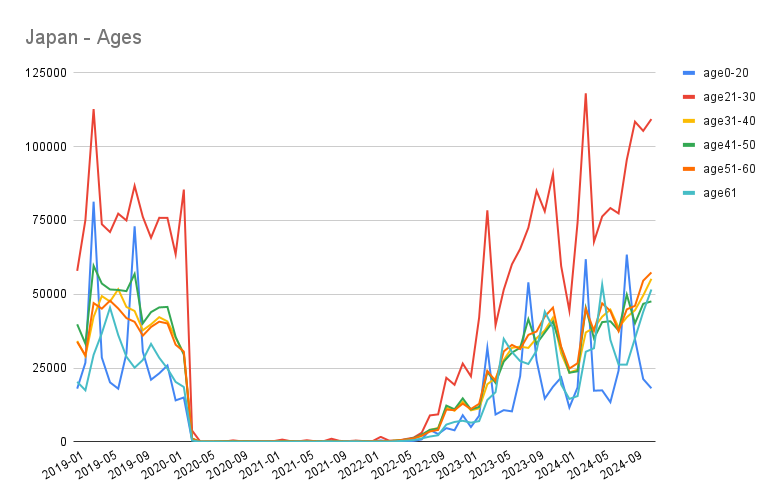

![Japan - Gender.png](<attachment:Japan - Gender.png>)
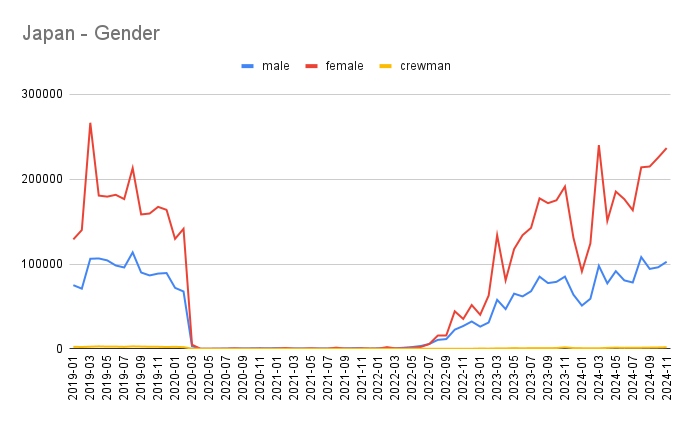

![Japan - Gender.png](<attachment:Japan - Gender.png>)
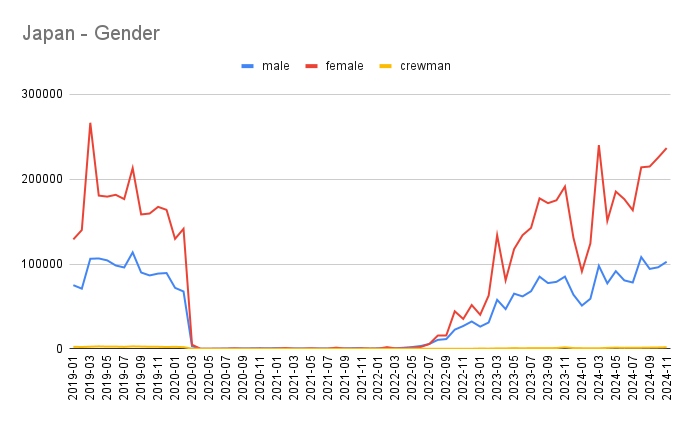

- 0 ~ 30은 고등학생, 대학생 커리큘럼에 맞춰 변동 => 동년배의 친구들끼리 여행
- 말할 필요도 없이 여성이 압도적
- 31부터는 거의 동일한 패턴으로 변동 => 가족 여행
    - 61 ~ 의 경우 판데믹 이후 31 ~ 60과의 동반 여행이 늘어난 것으로 보인다.
    - 일본의 연령대별 패턴 분석하여 뭉탱이로

In [53]:
jp_exp = pd.read_csv('japanese_travelers_to_korea_patterns.csv')
jp_exp

,연령대,성별,주요 방문 목적,선호 여행지,여행 형태,평균 체류기간(일),1인 평균 지출액(USD),주요 쇼핑품목,주요 특징
0,0-20세,남성,"K-POP 콘서트, 교복체험, 한국 문화체험","홍대, 명동, 롯데월드, 에버랜드","가족여행, 학교단체",2-3,600-800,"한국 과자, 문구류, K-POP 굿즈","SNS 영향, 부모 동반 많음"
1,0-20세,여성,"K-POP 아이돌, 한국 드라마, 교복·한복체험, SNS 인증샷","홍대, 명동, 성수동, 한남동 쇼룸거리, 올리브영","친구동반(2-4명), 가족여행",2-3,700-900,"K뷰티(화장품), K-POP 굿즈, 패션잡화, 액세서리","SNS·인플루언서 영향, 한류 열풍 주도층"
2,21-30세,남성,"음식 탐방, 사격체험, 골프, 쇼핑","을지로, 동대문, 강남, 부산","친구동반, 개별여행(FIT)",2-3,"800-1,000","식료품, 주류, 의류","실속형 여행, 다양한 체험 선호"
3,21-30세,여성,"미식(간장게장, 닭한마리), 쇼핑(화장품, 의류), K-POP, 카페투어","홍대, 명동, 성수동, 한남동, 광장시장, 더현대서울","친구동반(2-4명), 개별여행(FIT)",2-3,"1,000-1,200","화장품(50%), 의류, 가방/피혁, 한국 식품","최대 소비층(27% 비중), 미식·쇼핑 중심, 재방문율 높음"
4,31-40세,남성,"골프, 비즈니스, 음식탐방","강남, 여의도, 제주, 부산","개별여행, 비즈니스",3-4,"1,000-1,300","전자제품, 골프용품, 주류",비즈니스 겸한 관광
5,31-40세,여성,"미식, 화장품 쇼핑, 카페투어, 뷰티시술","명동, 홍대, 성수동, 한남동, 강남, 제주","친구동반, 개별여행(FIT)",2-3,"1,100-1,400","화장품(고급 브랜드), 패션, 생활용품","소비력 높음, K뷰티·K푸드 관심"
6,41-50세,남성,"골프, 비즈니스, 문화유적지 관광","서울 시내, 제주, 부산, 지방 골프장","단체여행, 골프여행",3-4,"1,200-1,500","한국 전통공예품, 인삼, 주류",소비력 높으나 방문 빈도 낮음
7,41-50세,여성,"쇼핑, 미식, K-드라마 성지순례","명동, 동대문, 남대문, 인사동, 제주","친구동반, 단체여행",3-4,"1,100-1,400","화장품, 의류, 한국 전통 기념품",안정적 소비층
8,51-60세,남성,"온천, 사찰, 역사 문화유적지","경주, 안동, 제주, 부산, 온천지역","단체여행, 부부동반",4-5,"1,300-1,600","한국 전통공예품, 인삼, 건강식품",여유로운 일정 선호
9,51-60세,여성,"쇼핑(고급 화장품), 미식, 건강검진","명동, 동대문, 인사동, 제주, 부산","친구동반, 단체여행",3-4,"1,200-1,500","화장품, 전통 기념품, 건강식품",중년층 중 안정적 소비


### 가설 01 : 학교 커리큘럼에 따라 

## 홍콩 방학 기간

홍콩의 학교와 대학은 9월 개학, 7월 종교일 기준으로 운영되며, 여름방학이 가장 길다.[4][9]

| 교육 단계 | 방학 유형 | 기간 (대략) |
|-----------|-----------|-------------|
| **고등학교** | 여름방학 | 7월 초 ~ 8월 말 (약 8-10주) [4] |
| | 겨울방학 | 12월 말 ~ 1월 초 (2주) [4] |
| | 춘절 방학 | 1월 말 ~ 2월 중 (1-2주) [4] |
| **대학** | 여름방학 | 6월 말 ~ 8월 말 (약 10-12주) [10] |
| | 겨울방학 | 12월 말 ~ 1월 중 (2-3주) [10] |
| | 춘절 방학 | 1월 말 ~ 2월 초 (1-2주) [10] |

## 대만 방학 기간

대만 교육은 9월 개학으로, 춘절이 겨울방학을 길게 만든다.[11][4]

| 교육 단계 | 방학 유형 | 기간 (대략) |
|-----------|-----------|-------------|
| **고등학교** | 여름방학 | 7월 1일 ~ 8월 31일 (약 2개월) [4] |
| | 겨울방학 | 1월 15일 ~ 2월 15일 (약 1개월, 춘절 포함) [4] |
| **대학** | 여름방학 | 7월 ~ 8월 말 (약 8주) [12] |
| | 겨울방학 | 1월 말 ~ 2월 중 (3-4주, 춘절 포함) [12] |

## 일본 방학 기간

일본은 4월 개학, 3월 종교일로, 방학이 상대적으로 짧다.[2][3]

| 교육 단계 | 방학 유형 | 기간 (대략) |
|-----------|-----------|-------------|
| **고등학교** | 여름방학 | 7월 20일 ~ 8월 31일 (약 6주) [2][3] |
| | 겨울방학 | 12월 26일 ~ 1월 7일 (약 2주) [2] |
| | 춘방학 | 3월 25일 ~ 4월 초 (약 2주) [3] |
| **대학** | 여름방학 | 7월 말 ~ 9월 초 (약 6-8주) [13] |
| | 겨울방학 | 12월 말 ~ 1월 중 (2-3주) [13] |
| | 춘방학 | 2월 말 ~ 4월 초 (약 4주) [13] |

이 기간은 학교/대학 및 지역에 따라 약간 변동될 수 있으며, 공휴일(춘절, 골든위크)이 추가로 영향을 준다.[3][4]

[1](https://jet.ac.jp/ko/school-life/schedule/)
[2](https://kin.naver.com/qna/dirs/11080401/docs/477731281?d1id=11)
[3](https://www.fun-japan.jp/ko/articles/14095)
[4](https://namu.wiki/w/%EC%97%AC%EB%A6%84%EB%B0%A9%ED%95%99)
[5](https://www.yskli.com/course.php?mid=K01_01)
[6](https://campus.cufs.ac.kr/cmn/ExtCmnFileDown/fileDownLoad.do?FILE_SERIAL_NO=1006&SEQ=1)
[7](https://www.goe.go.kr/resource/old/BBSMSTR_000000030137/BBS_202401310930264021.pdf)
[8](https://ipsi.sejong.ac.kr/board/upload_file/pdf/20256109125777587.pdf)
[9](https://livinginhk.tistory.com/entry/%ED%99%8D%EC%BD%A9-%EA%B5%90%EC%9C%A1-%EC%8B%9C%EC%8A%A4%ED%85%9C-%EC%99%84%EB%B2%BD-%EA%B0%80%EC%9D%B4%EB%93%9C-%ED%95%99%EC%A0%9C-%EB%8C%80%ED%95%99-%EC%A7%84%ED%95%99-%ED%95%9C%EA%B5%AD%EA%B3%BC%EC%9D%98-%EB%B9%84%EA%B5%90)
[10](https://www.studyinhongkong.edu.hk/ko/hong-kong-education/education-system.php)
[11](https://www.scribd.com/document/735011188/%EC%97%B0%EA%B5%AC%EB%B3%B4%EA%B3%A0%EC%84%9C-23-11-%EA%B5%AD%EB%AF%BC%EA%B3%BC-%EB%AF%B8%EB%9E%98%EB%8C%80%ED%99%94-%EC%97%B0%EA%B5%AC-%EC%9D%B4%EB%A8%B8%EC%A7%95-%EC%8B%9C%ED%8B%B0%EC%A6%8C%EC%9D%84-%EC%B0%BE%EC%95%84%EC%84%9C-1)
[12](https://www.lemonlab.pro/2025-foreign-visitor-statistics-korea/)
[13](https://monitor.icef.com/2024/07/south-korea-on-track-to-attract-thousands-more-international-students-within-the-decade/)

In [54]:
# ============================================
# 대한민국 방문객 데이터 중요도 분석 (원본 컬럼만 사용)
# ============================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# -----------------------------
# 1) 데이터 로드
# -----------------------------
PATH = "./South_korea_visitor(19_24)_cleaned.csv"  # ⚠️ 경로 조정
df = pd.read_csv(PATH)
df.columns = [c.strip().lower() for c in df.columns]

# 방문객(target) 컬럼 탐색
vis_col = next(
    (c for c in ["visitors", "visitor", "방한 외래관광객(명)", "total_visitors", "count"] if c in df.columns),
    None,
)
if vis_col is None:
    num_cols = df.select_dtypes(include=[np.number]).columns
    vis_col = num_cols[np.argmax(df[num_cols].var())]

print(f"[INFO] Target: {vis_col}")

# -----------------------------
# 2) 불필요한 컬럼 제외
# -----------------------------
drop_keywords = ["tourism", "business", "official", "affairs", "studying", "others", "crewman"]
drop_cols_custom = [c for c in df.columns if any(k in c.lower() for k in drop_keywords)]

# 타겟, 날짜, 불필요 컬럼 제거
drop_base = drop_cols_custom + ["date", vis_col]
X = df.drop(columns=[c for c in drop_base if c in df.columns], errors="ignore")
y = df[vis_col].astype(float)

print(f"[INFO] 제외된 칼럼: {drop_cols_custom}")

# -----------------------------
# 3) 수치형/범주형 구분
# -----------------------------
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

# -----------------------------
# 4) OneHotEncoder (버전 호환)
# -----------------------------
if cat_cols:
    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
    X_cat = ohe.fit_transform(X[cat_cols])
    cat_names = ohe.get_feature_names_out(cat_cols)
    X_cat_df = pd.DataFrame(X_cat, columns=cat_names, index=X.index)
else:
    X_cat_df = pd.DataFrame(index=X.index)

X_all = pd.concat([X[num_cols], X_cat_df], axis=1).fillna(0.0)

# -----------------------------
# 5) Ridge 회귀 + 표준화
# -----------------------------
X_mean, X_std = X_all.mean(), X_all.std(ddof=0).replace(0, 1.0)
Xz = (X_all - X_mean) / X_std
y_mean, y_std = y.mean(), y.std(ddof=0) or 1.0
yz = (y - y_mean) / y_std

ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(Xz, yz)

coef_std = pd.Series(ridge.coef_, index=Xz.columns)

print("\n=== [중요도1] 표준화 계수 상위 20 ===")
print(coef_std.abs().sort_values(ascending=False).head(20))
print(f"\nRidge R² (in-sample): {r2_score(yz, ridge.predict(Xz)):.4f}")

# -----------------------------
# 6) Permutation Importance
# -----------------------------
n_sample = min(2000, len(Xz))
X_perm, y_perm = Xz.sample(n_sample, random_state=42), yz.sample(n_sample, random_state=42)

perm = permutation_importance(ridge, X_perm, y_perm, n_repeats=10, random_state=42)
perm_df = pd.DataFrame(
    {"importance": perm.importances_mean, "std": perm.importances_std}, index=Xz.columns
)

print("\n=== [중요도2] Permutation Importance 상위 20 ===")
print(perm_df.sort_values("importance", ascending=False).head(20))

# -----------------------------
# 7) 요약
# -----------------------------
print("\n[요약]")
print(f"- 총 샘플 수: {len(X_all)}")
print(f"- 사용 피처: {len(X_all.columns)}개 (원본 컬럼만 사용)")
print(f"- Ridge R²: {r2_score(yz, ridge.predict(Xz)):.4f}")
print("- 표준화 계수 = 선형 영향력, Permutation = 예측 저하 기반 전역 영향력")


[INFO] Target: visitor
[INFO] 제외된 칼럼: ['crewman', 'tourism', 'business', 'official affairs', 'studying', 'others']

=== [중요도1] 표준화 계수 상위 20 ===
age21-30            0.203517
age31-40            0.189228
female              0.179697
male                0.113298
age61               0.101546
age41-50            0.093337
age0-20             0.084460
age51-60            0.075489
nation_USA          0.012846
nation_Taiwan       0.006500
nation_Hong Kong    0.005413
nation_Japan        0.005176
nation_China        0.004243
dtype: float64

Ridge R² (in-sample): 0.9999

=== [중요도2] Permutation Importance 상위 20 ===
                  importance       std
age21-30            0.083069  0.003860
age31-40            0.071107  0.004524
female              0.064581  0.003118
male                0.025570  0.001293
age61               0.020763  0.000929
age41-50            0.017404  0.000742
age0-20             0.014176  0.000410
age51-60            0.011464  0.000442
nation_USA          0.000331  0.000023

In [55]:
# ============================================
# 대한민국 방문객 데이터 중요도 분석 (원본 컬럼만 사용 + 다중 중요도 비교)
# ============================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import mutual_info_regression

# -----------------------------
# 1) 데이터 로드
# -----------------------------
PATH = "./South_korea_visitor(19_24)_cleaned.csv"  # ⚠️ 경로 확인
df = pd.read_csv(PATH)
df.columns = [c.strip().lower() for c in df.columns]

# 타겟 컬럼 자동 탐색
vis_col = next(
    (c for c in ["visitors", "visitor", "방한 외래관광객(명)", "total_visitors", "count"] if c in df.columns),
    None,
)
if vis_col is None:
    num_cols = df.select_dtypes(include=[np.number]).columns
    vis_col = num_cols[np.argmax(df[num_cols].var())]
print(f"[INFO] Target: {vis_col}")

# -----------------------------
# 2) 불필요한 컬럼 제외
# -----------------------------
drop_keywords = ["tourism", "business", "official", "affairs", "studying", "others", "crewman", "nation_USA"]
drop_cols_custom = [c for c in df.columns if any(k in c.lower() for k in drop_keywords)]
drop_base = drop_cols_custom + ["date", vis_col]

X = df.drop(columns=[c for c in drop_base if c in df.columns], errors="ignore")
y = df[vis_col].astype(float)
print(f"[INFO] 제외된 컬럼: {drop_cols_custom}")

# -----------------------------
# 3) 수치형/범주형 분리 + 인코딩
# -----------------------------
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

if cat_cols:
    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
    X_cat = ohe.fit_transform(X[cat_cols])
    cat_names = ohe.get_feature_names_out(cat_cols)
    X_cat_df = pd.DataFrame(X_cat, columns=cat_names, index=X.index)
else:
    X_cat_df = pd.DataFrame(index=X.index)

X_all = pd.concat([X[num_cols], X_cat_df], axis=1).fillna(0.0)
feature_names = X_all.columns.tolist()

# -----------------------------
# 4) 표준화
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)
y_scaled = (y - y.mean()) / (y.std(ddof=0) or 1.0)

# -----------------------------
# 5) Ridge 회귀 중요도
# -----------------------------
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_scaled, y_scaled)
ridge_coef = pd.Series(np.abs(ridge.coef_), index=feature_names, name="RidgeCoef")

print("\n=== [1] Ridge 표준화 계수 상위 15 ===")
print(ridge_coef.sort_values(ascending=False).head(15))

# -----------------------------
# 6) Permutation Importance
# -----------------------------
perm = permutation_importance(ridge, X_scaled, y_scaled, n_repeats=10, random_state=42)
perm_imp = pd.Series(perm.importances_mean, index=feature_names, name="Permutation")

print("\n=== [2] Permutation Importance 상위 15 ===")
print(perm_imp.sort_values(ascending=False).head(15))

# -----------------------------
# 7) RandomForest 중요도
# -----------------------------
rf = RandomForestRegressor(
    n_estimators=300, max_depth=None, random_state=42, n_jobs=-1
)
rf.fit(X_all, y)
rf_imp = pd.Series(rf.feature_importances_, index=feature_names, name="RandomForest")

print("\n=== [3] RandomForest Feature Importance 상위 15 ===")
print(rf_imp.sort_values(ascending=False).head(15))

# -----------------------------
# 8) GradientBoosting 중요도
# -----------------------------
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_all, y)
gb_imp = pd.Series(gb.feature_importances_, index=feature_names, name="GBDT")

print("\n=== [4] GradientBoosting Feature Importance 상위 15 ===")
print(gb_imp.sort_values(ascending=False).head(15))

# -----------------------------
# 9) Mutual Information (비선형 상관성)
# -----------------------------
mi = mutual_info_regression(X_all, y, random_state=42)
mi_imp = pd.Series(mi, index=feature_names, name="MutualInfo")

print("\n=== [5] Mutual Information 상위 15 ===")
print(mi_imp.sort_values(ascending=False).head(15))

# -----------------------------
# 10) 중요도 통합 비교 테이블
# -----------------------------
importance_df = pd.concat(
    [ridge_coef, perm_imp, rf_imp, gb_imp, mi_imp], axis=1
).fillna(0)

# 표준화 (0~1 스케일)
importance_df_norm = importance_df / importance_df.max()
importance_df_norm["MeanRank"] = importance_df_norm.mean(axis=1)
importance_df_norm = importance_df_norm.sort_values("MeanRank", ascending=False)

print("\n=== [중요도 종합 순위 Top 20] ===")
print(importance_df_norm.head(20).round(3))

# -----------------------------
# 11) 요약
# -----------------------------
print("\n[요약]")
print(f"- 사용 피처: {len(feature_names)}개 (원본 컬럼만 사용)")
print(f"- Ridge R² (in-sample): {r2_score(y_scaled, ridge.predict(X_scaled)):.4f}")
print("- Ridge = 선형, RF/GBDT = 비선형 트리기반, MI = 통계적 의존도")
print("- 여러 모델에서 공통적으로 높은 피처가 진짜 중요한 신호일 가능성이 높음")


[INFO] Target: visitor
[INFO] 제외된 컬럼: ['crewman', 'tourism', 'business', 'official affairs', 'studying', 'others']

=== [1] Ridge 표준화 계수 상위 15 ===
age21-30            0.203517
age31-40            0.189228
female              0.179697
male                0.113298
age61               0.101546
age41-50            0.093337
age0-20             0.084460
age51-60            0.075489
nation_USA          0.012846
nation_Taiwan       0.006500
nation_Hong Kong    0.005413
nation_Japan        0.005176
nation_China        0.004243
Name: RidgeCoef, dtype: float64

=== [2] Permutation Importance 상위 15 ===
age21-30            0.081738
age31-40            0.070681
female              0.063806
male                0.025421
age61               0.020157
age41-50            0.017291
age0-20             0.014379
age51-60            0.011273
nation_USA          0.000334
nation_Taiwan       0.000087
nation_Hong Kong    0.000058
nation_Japan        0.000054
nation_China        0.000036
Name: Permutation, dtype:

2024: 국적(D_NAT), 연령(D_AGE), 목적(D_MOK, Q1), 부족했던 정보(Q4_2a1 ~ Q4_2a_dk), 방문월(D_MON)
D_NAT, D_AGE, D_MOK, Q1, D_MON
Q4_2a1
Q4_2a2
Q4_2a3
Q4_2a_dk
- 1 : 중국
- 2 : 일본
- 3 : 대만
- 5 : 홍콩

1 : 방문지정보 (개장시간, 입장료, 여행코스, 날씨 등)
2 : 교통정보(이동거리, 동선 등)
3 : 음식 및 맛집 정보
4 : 쇼핑 정보
5 : 숙박 정보
6 : 지역 축제 및 행사 정보
7 : 한류 문화체험 관련 정보 (K-POP공연, 촬영지 방문 등)
8 : 금융 정보(ATM, 환전소 등)
9 : 통신 이용정보(무료 Wi-Fi, 유심칩 구입방법, 요금제 등)
10 : 기타
11 : 없다

In [56]:
# All values in object
df2024 = pd.read_csv("외래관광객조사_DATA_2024.csv", dtype=str)

In [57]:
df2024

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight
0,57,5,4,5.0,1,1,7.0,NaN,NaN,NaN,...,2,5,1,4,1,198.01714587687297,NaN,NaN,NaN,198.01714587687297
1,58,4,4,5.0,1,1,7.0,10.0,2.0,1.0,...,2,4,1,4,1,784.2784009458401,NaN,NaN,NaN,784.2784009458401
2,59,3,3,5.0,1,1,7.0,2.0,8.0,1.0,...,2,3,1,3,1,607.02126923042,NaN,NaN,NaN,607.02126923042
3,60,1,1,NaN,1,1,8.0,7.0,3.0,NaN,...,1,2,1,1,1,1049.5001433881,NaN,NaN,NaN,1049.5001433881
4,61,5,4,5.0,1,1,2.0,9.0,10.0,4.0,...,2,2,1,4,1,876.7969357365749,NaN,NaN,NaN,876.7969357365749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16211,19273,2,2,5.0,1,1,5.0,4.0,7.0,1.0,...,2,4,1,2,1,NaN,NaN,NaN,1215.2182857172197,1215.2182857172197
16212,19274,2,2,5.0,1,1,9.0,2.0,7.0,5.0,...,1,4,1,2,1,NaN,NaN,NaN,1131.83475059787,1131.83475059787
16213,19275,1,1,NaN,1,1,5.0,7.0,NaN,NaN,...,2,5,1,1,1,NaN,NaN,NaN,1212.3823534493902,1212.3823534493902
16214,19277,2,2,5.0,1,1,2.0,4.0,6.0,NaN,...,1,5,1,2,1,NaN,NaN,NaN,1287.85277945795,1287.85277945795


In [58]:
# Nations of interest
df_filtered = df2024[df2024["D_NAT"].isin(["1", "2", "3", "5"])]

In [ ]:
# Calumns of interest
df_selected = df_filtered[["D_NAT", "D_AGE", "D_MOK", "Q1", "D_MON", 
                  "Q4_2a1", "Q4_2a2", "Q4_2a3", "Q4_2a_dk"]]

df_selected

,D_NAT,D_AGE,D_MOK,Q1,D_MON,Q4_2a1,Q4_2a2,Q4_2a3,Q4_2a_dk
1,3,4,1,1,1,NaN,NaN,NaN,11.0
2,3,3,1,1,1,NaN,NaN,NaN,11.0
3,1,2,1,1,1,NaN,NaN,NaN,11.0
4,3,2,1,1,1,NaN,NaN,NaN,11.0
5,3,2,1,1,1,NaN,NaN,NaN,11.0
...,...,...,...,...,...,...,...,...,...
16210,1,3,3,3,12,2.0,1.0,NaN,NaN
16211,1,4,1,1,12,NaN,NaN,NaN,11.0
16212,1,4,1,1,12,1.0,7.0,6.0,NaN
16213,1,5,1,1,12,NaN,NaN,NaN,11.0


In [69]:
# Nation's name replacement

df_selected["D_NAT"] = df_selected["D_NAT"].replace({"1": "중국", "2": "일본", "3": "대만", "5": "홍콩"})

C:\Users\User\AppData\Local\Temp\ipykernel_9052\3280761143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["D_NAT"] = df_selected["D_NAT"].replace({"1": "중국", "2": "일본", "3": "대만", "5": "홍콩"})


In [71]:
df_selected

,D_NAT,D_AGE,D_MOK,Q1,D_MON,Q4_2a1,Q4_2a2,Q4_2a3,Q4_2a_dk
1,대만,4,1,1,1,NaN,NaN,NaN,11.0
2,대만,3,1,1,1,NaN,NaN,NaN,11.0
3,중국,2,1,1,1,NaN,NaN,NaN,11.0
4,대만,2,1,1,1,NaN,NaN,NaN,11.0
5,대만,2,1,1,1,NaN,NaN,NaN,11.0
...,...,...,...,...,...,...,...,...,...
16210,중국,3,3,3,12,2.0,1.0,NaN,NaN
16211,중국,4,1,1,12,NaN,NaN,NaN,11.0
16212,중국,4,1,1,12,1.0,7.0,6.0,NaN
16213,중국,5,1,1,12,NaN,NaN,NaN,11.0
